In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import os


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leaf-classification/train.csv.zip
/kaggle/input/leaf-classification/sample_submission.csv.zip
/kaggle/input/leaf-classification/images.zip
/kaggle/input/leaf-classification/test.csv.zip
/kaggle/input/images/9.jpg
/kaggle/input/images/11.jpg
/kaggle/input/images/3.jpg


# Read data

In [2]:
df_train = pd.read_csv("/kaggle/input/leaf-classification/train.csv.zip",index_col="id")
df_train.head()

species   margin1   margin2   margin3   margin4   margin5  \
id                                                                            
1             Acer_Opalus  0.007812  0.023438  0.023438  0.003906  0.011719   
2   Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625  0.025391   
3    Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812  0.003906   
5         Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859  0.021484   
6      Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766  0.013672   

     margin6   margin7  margin8   margin9  ...  texture55  texture56  \
id                                         ...                         
1   0.009766  0.027344      0.0  0.001953  ...   0.007812   0.000000   
2   0.001953  0.019531      0.0  0.000000  ...   0.000977   0.000000   
3   0.005859  0.068359      0.0  0.000000  ...   0.154300   0.000000   
5   0.019531  0.023438      0.0  0.013672  ...   0.000000   0.000977   
6   0.015625  0.005859      0.0  0.000000  ...   0.096680   0.000000   

    texture57  texture58  texture59  texture60  texture61  texture62  \
id                                                                     
1    0.002930   0.002930   0.035156        0.0        0.0   0.004883   
2    0.000000   0.000977   0.023438        0.0        0.0   0.000977   
3    0.005859   0.000977   0.007812        0.0        0.0   0.000000   
5    0.000000   0.000000   0.020508        0.0        0.0   0.017578   
6    0.021484   0.000000   0.000000        0.0        0.0   0.000000   

    texture63  texture64  
id                        
1    0.000000   0.025391  
2    0.039062   0.022461  
3    0.020508   0.002930  
5    0.000000   0.047852  
6    0.000000   0.031250  

[5 rows x 193 columns]

In [3]:
df_test = pd.read_csv("/kaggle/input/leaf-classification/test.csv.zip",index_col="id")
df_test.head()

margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
id                                                                         
4   0.019531  0.009766  0.078125  0.011719  0.003906  0.015625  0.005859   
7   0.007812  0.005859  0.064453  0.009766  0.003906  0.013672  0.007812   
9   0.000000  0.000000  0.001953  0.021484  0.041016  0.000000  0.023438   
12  0.000000  0.000000  0.009766  0.011719  0.017578  0.000000  0.003906   
13  0.001953  0.000000  0.015625  0.009766  0.039062  0.000000  0.009766   

    margin8   margin9  margin10  ...  texture55  texture56  texture57  \
id                               ...                                    
4       0.0  0.005859  0.023438  ...   0.006836   0.000000   0.015625   
7       0.0  0.033203  0.023438  ...   0.000000   0.000000   0.006836   
9       0.0  0.011719  0.005859  ...   0.128910   0.000000   0.000977   
12      0.0  0.003906  0.001953  ...   0.012695   0.015625   0.002930   
13      0.0  0.005859  0.000000  ...   0.000000   0.042969   0.016602   

    texture58  texture59  texture60  texture61  texture62  texture63  \
id                                                                     
4    0.000977   0.015625        0.0        0.0   0.000000   0.003906   
7    0.001953   0.013672        0.0        0.0   0.000977   0.037109   
9    0.000000   0.000000        0.0        0.0   0.015625   0.000000   
12   0.036133   0.013672        0.0        0.0   0.089844   0.000000   
13   0.010742   0.041016        0.0        0.0   0.007812   0.009766   

    texture64  
id             
4    0.053711  
7    0.044922  
9    0.000000  
12   0.008789  
13   0.007812  

[5 rows x 192 columns]

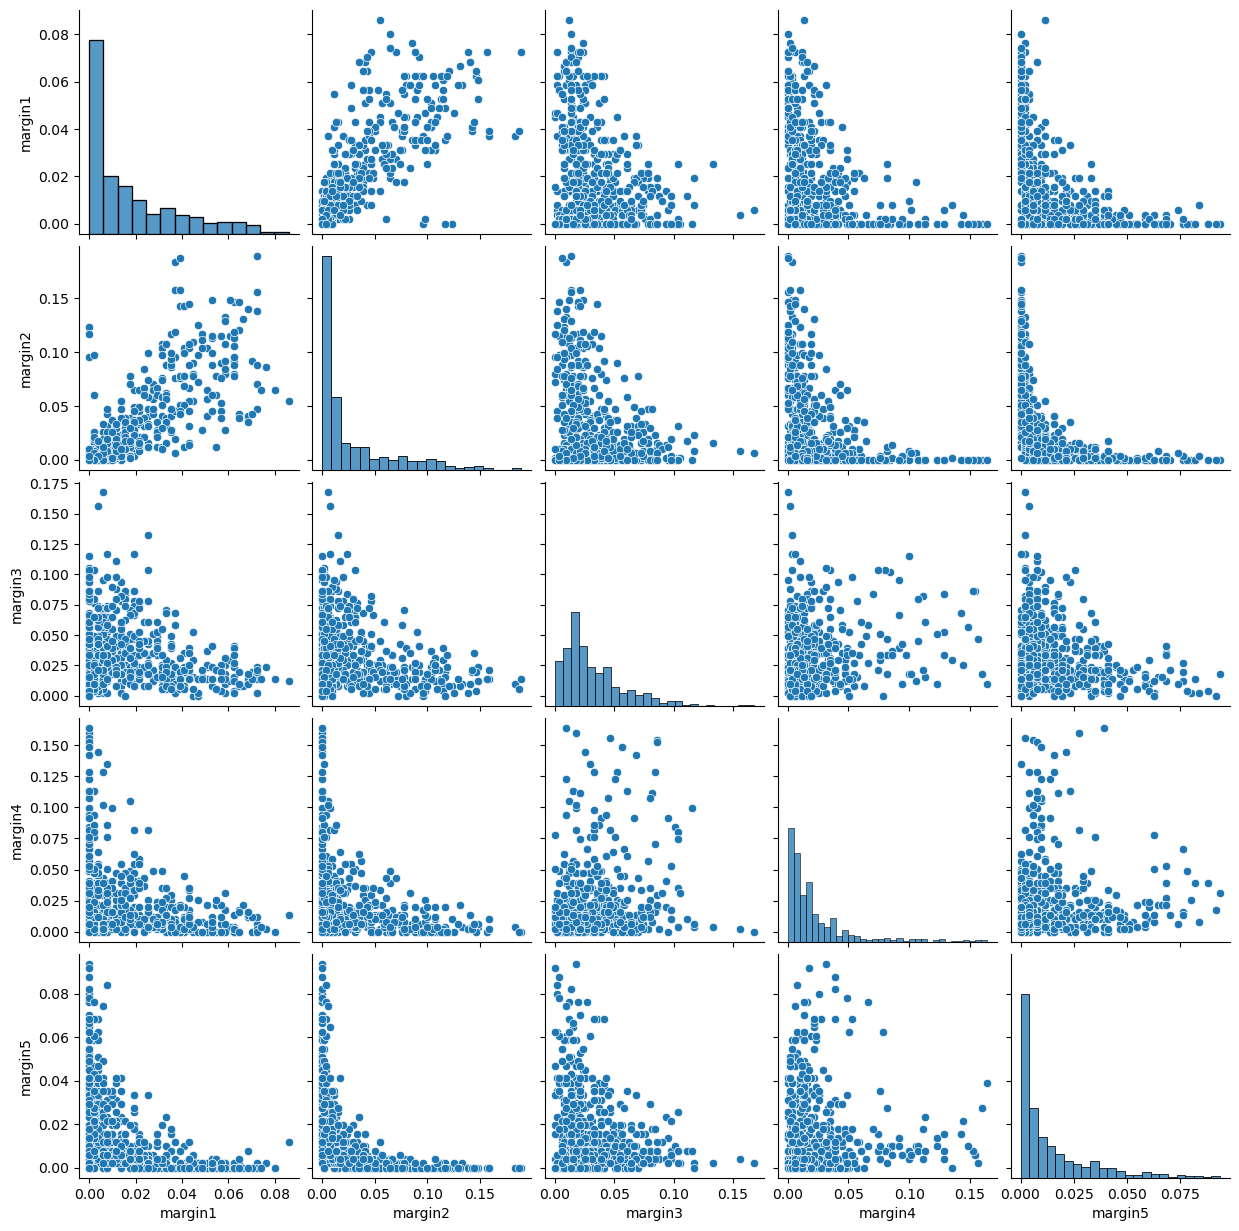

In [4]:
sns.pairplot(df_test.iloc[:,:5])

# Explor the data

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 1 to 1584
Columns: 193 entries, species to texture64
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


In [6]:
df_train.describe()

margin1     margin2     margin3     margin4     margin5     margin6  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.017412    0.028539    0.031988    0.023280    0.014264    0.038579   
std      0.019739    0.038855    0.025847    0.028411    0.018390    0.052030   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.001953    0.001953    0.013672    0.005859    0.001953    0.000000   
50%      0.009766    0.011719    0.025391    0.013672    0.007812    0.015625   
75%      0.025391    0.041016    0.044922    0.029297    0.017578    0.056153   
max      0.087891    0.205080    0.156250    0.169920    0.111330    0.310550   

          margin7     margin8     margin9    margin10  ...   texture55  \
count  990.000000  990.000000  990.000000  990.000000  ...  990.000000   
mean     0.019202    0.001083    0.007167    0.018639  ...    0.036501   
std      0.017511    0.002743    0.008933    0.016071  ...    0.063403   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.005859    0.000000    0.001953    0.005859  ...    0.000000   
50%      0.015625    0.000000    0.005859    0.015625  ...    0.004883   
75%      0.029297    0.000000    0.007812    0.027344  ...    0.043701   
max      0.091797    0.031250    0.076172    0.097656  ...    0.429690   

        texture56   texture57   texture58   texture59   texture60   texture61  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.005024    0.015944    0.011586    0.016108    0.014017    0.002688   
std      0.019321    0.023214    0.025040    0.015335    0.060151    0.011415   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000977    0.000000    0.004883    0.000000    0.000000   
50%      0.000000    0.005859    0.000977    0.012695    0.000000    0.000000   
75%      0.000000    0.022217    0.009766    0.021484    0.000000    0.000000   
max      0.202150    0.172850    0.200200    0.106450    0.578130    0.151370   

        texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  
mean     0.020291    0.008989    0.019420  
std      0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000977  
50%      0.003906    0.002930    0.011719  
75%      0.023438    0.012695    0.029297  
max      0.375980    0.086914    0.141600  

[8 rows x 192 columns]

In [7]:
df_train["species"].value_counts()

Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64

In [8]:
null = df_train.isnull().sum()

In [9]:
null[null > 0].index

Index([], dtype='object')

# No Null values

In [10]:
df_train.shape

(990, 193)

In [11]:
df_train.drop_duplicates(inplace=True)

In [12]:
df_train.shape

(990, 193)

# No duplicates in data

# Draw some images

- Warning: you should change the path if you need to try the code 

In [13]:
def load_images_from_folder(path):
    images = []
    for filename in os.listdir(path):
        img = mpimg.imread(os.path.join(path,filename))
        if img is not None:
            images.append(img)
    return images

In [14]:
img = load_images_from_folder("/kaggle/input/images")
img[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

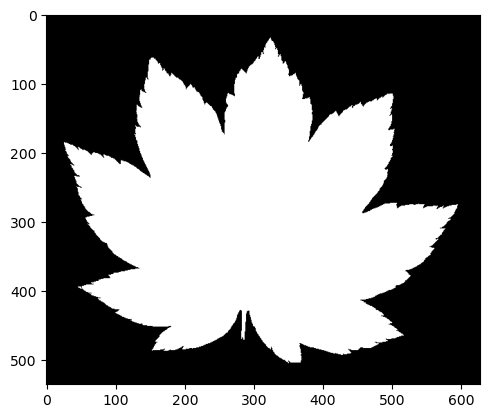

In [15]:
plt.imshow(img[0], cmap="gray")

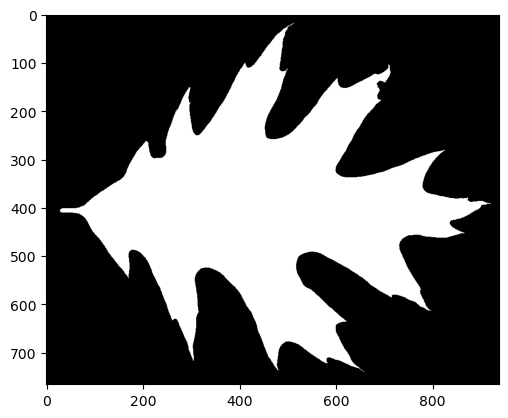

In [16]:
plt.imshow(img[1], cmap="gray")

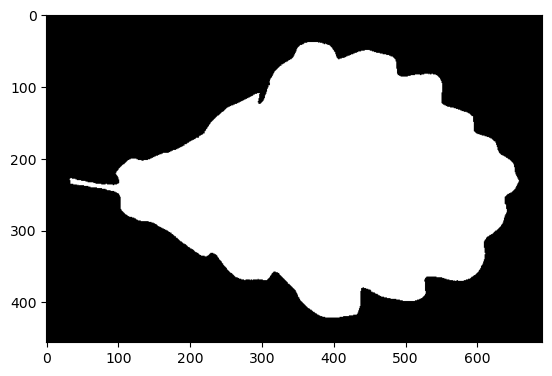

In [17]:
plt.imshow(img[2], cmap="gray")

# Correlation

In [18]:
corr = df_train.corr()
corr1 = corr.iloc[:40,:40]
corr2 = corr.iloc[40:80,40:80]
corr3 = corr.iloc[80:120,80:120]
corr4 = corr.iloc[120:192,120:192]

<AxesSubplot:>

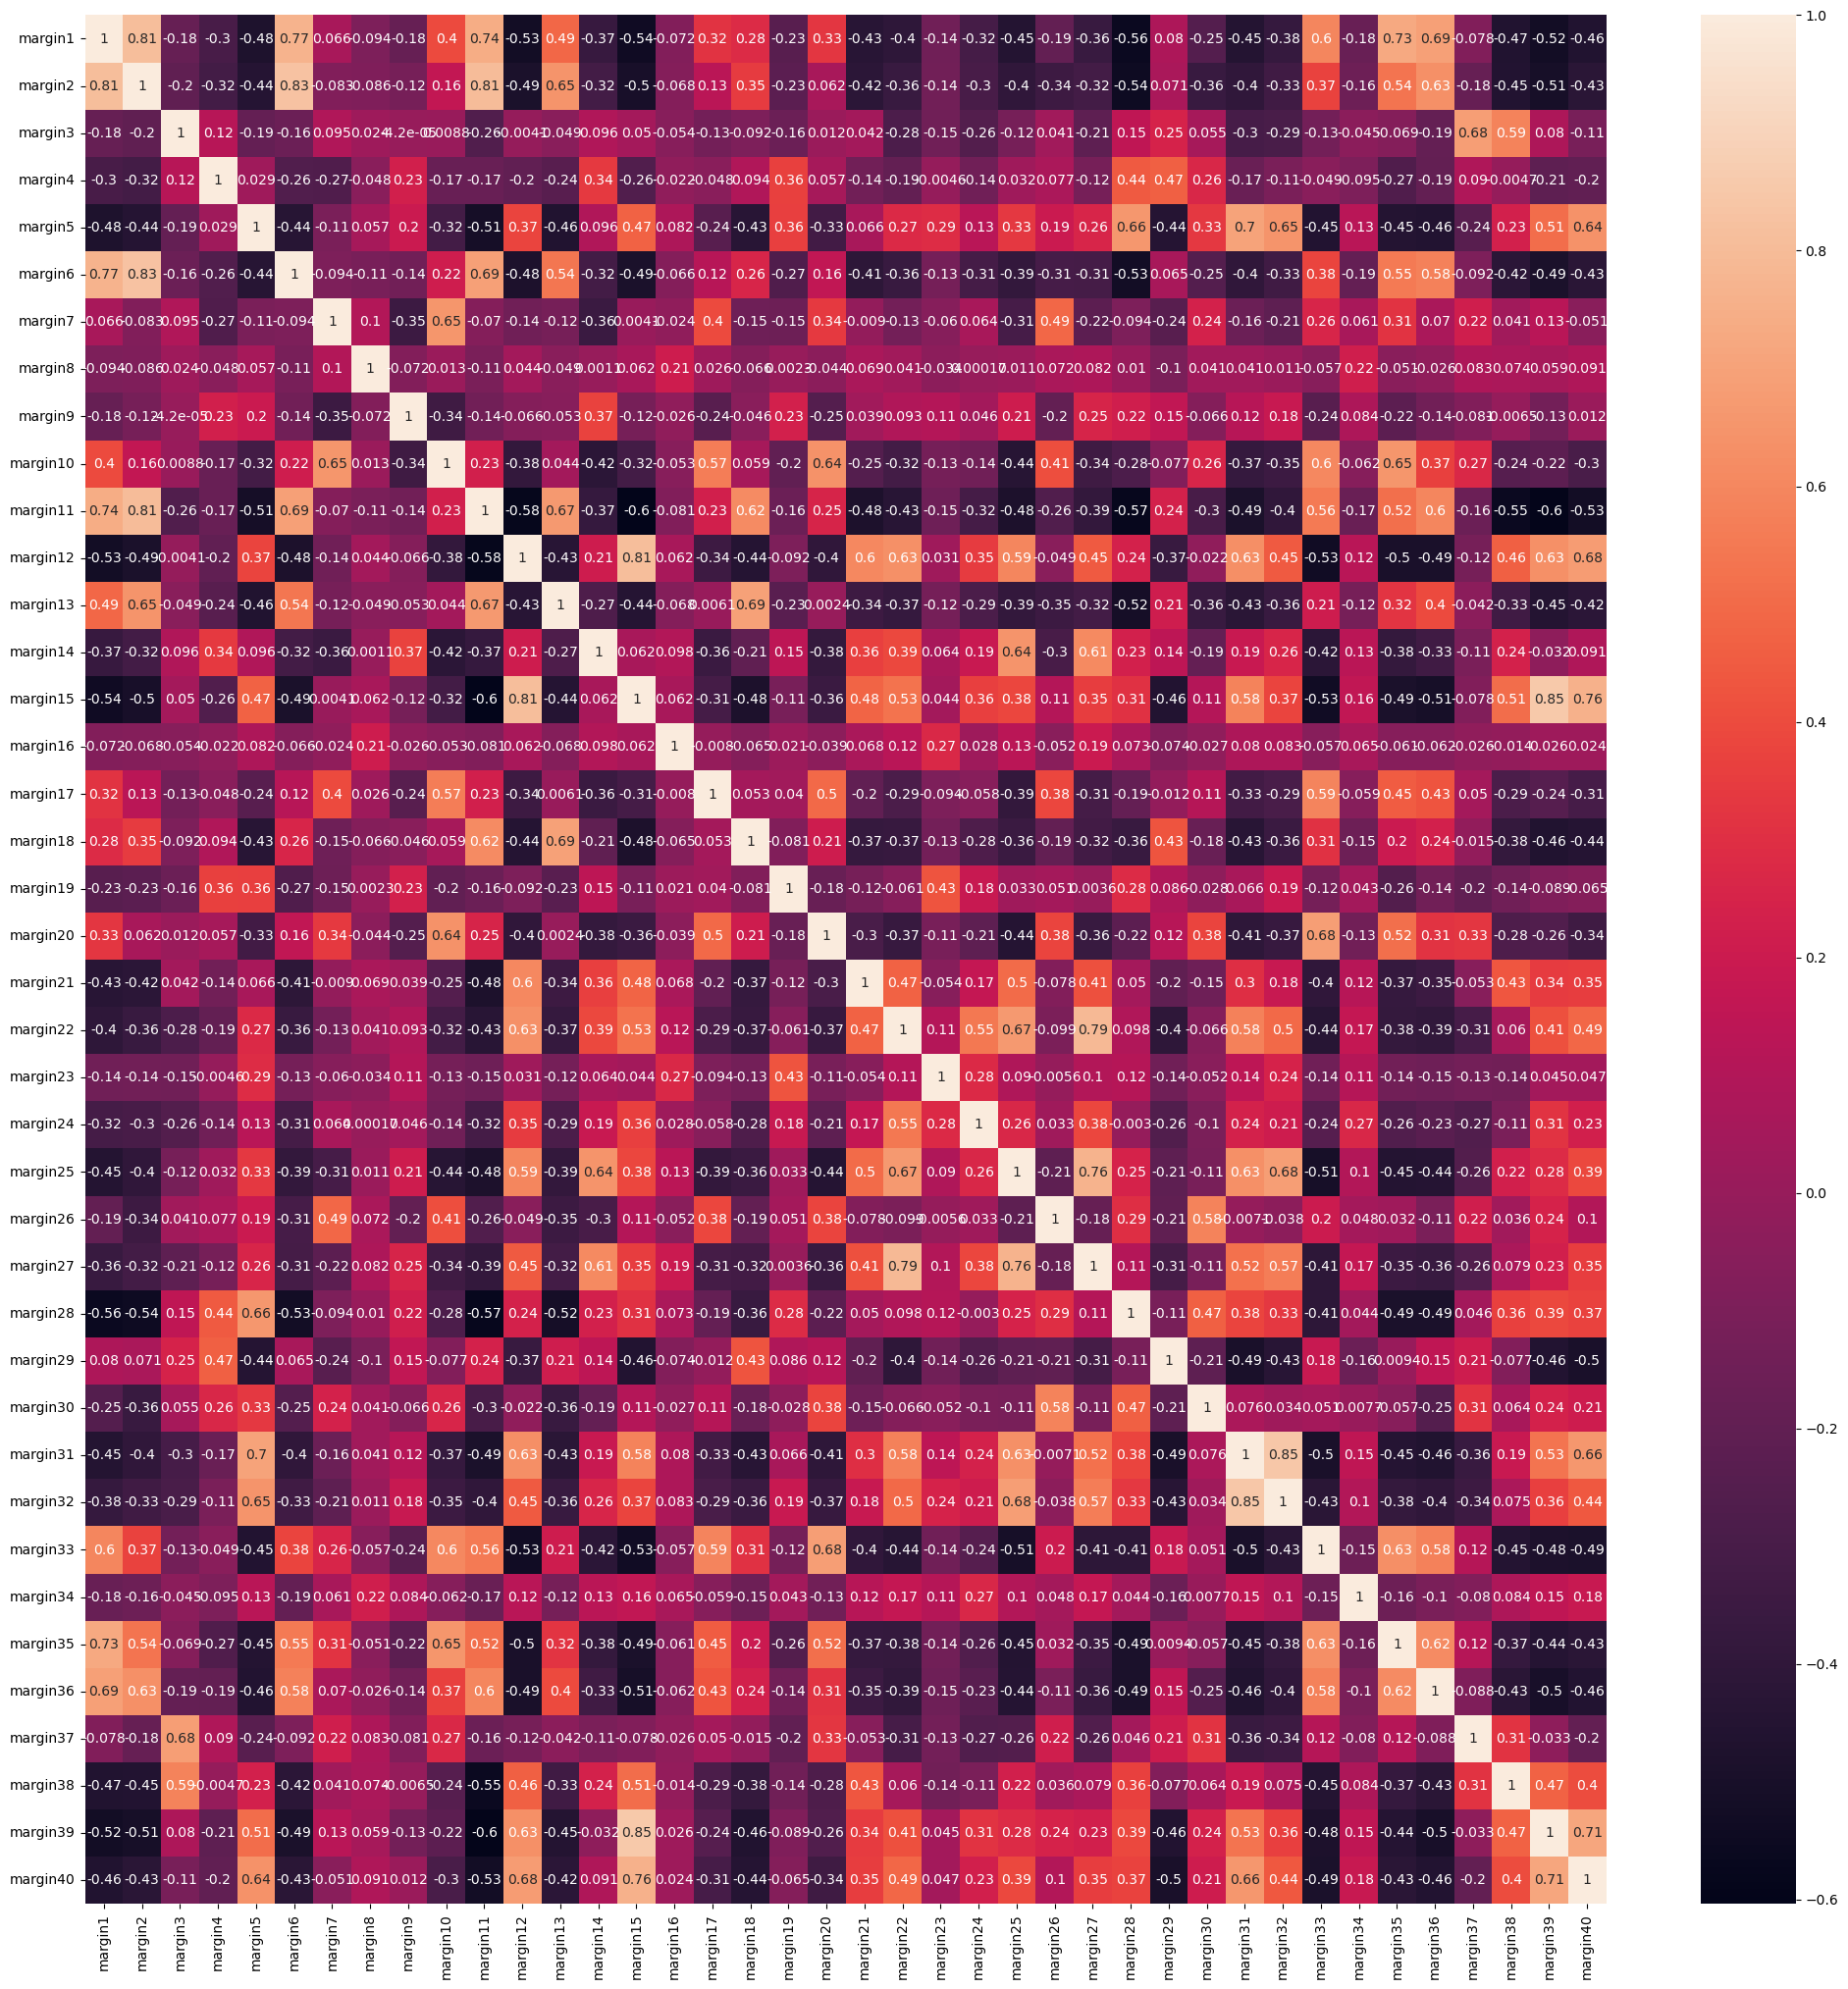

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(corr1,annot=True)

<AxesSubplot:>

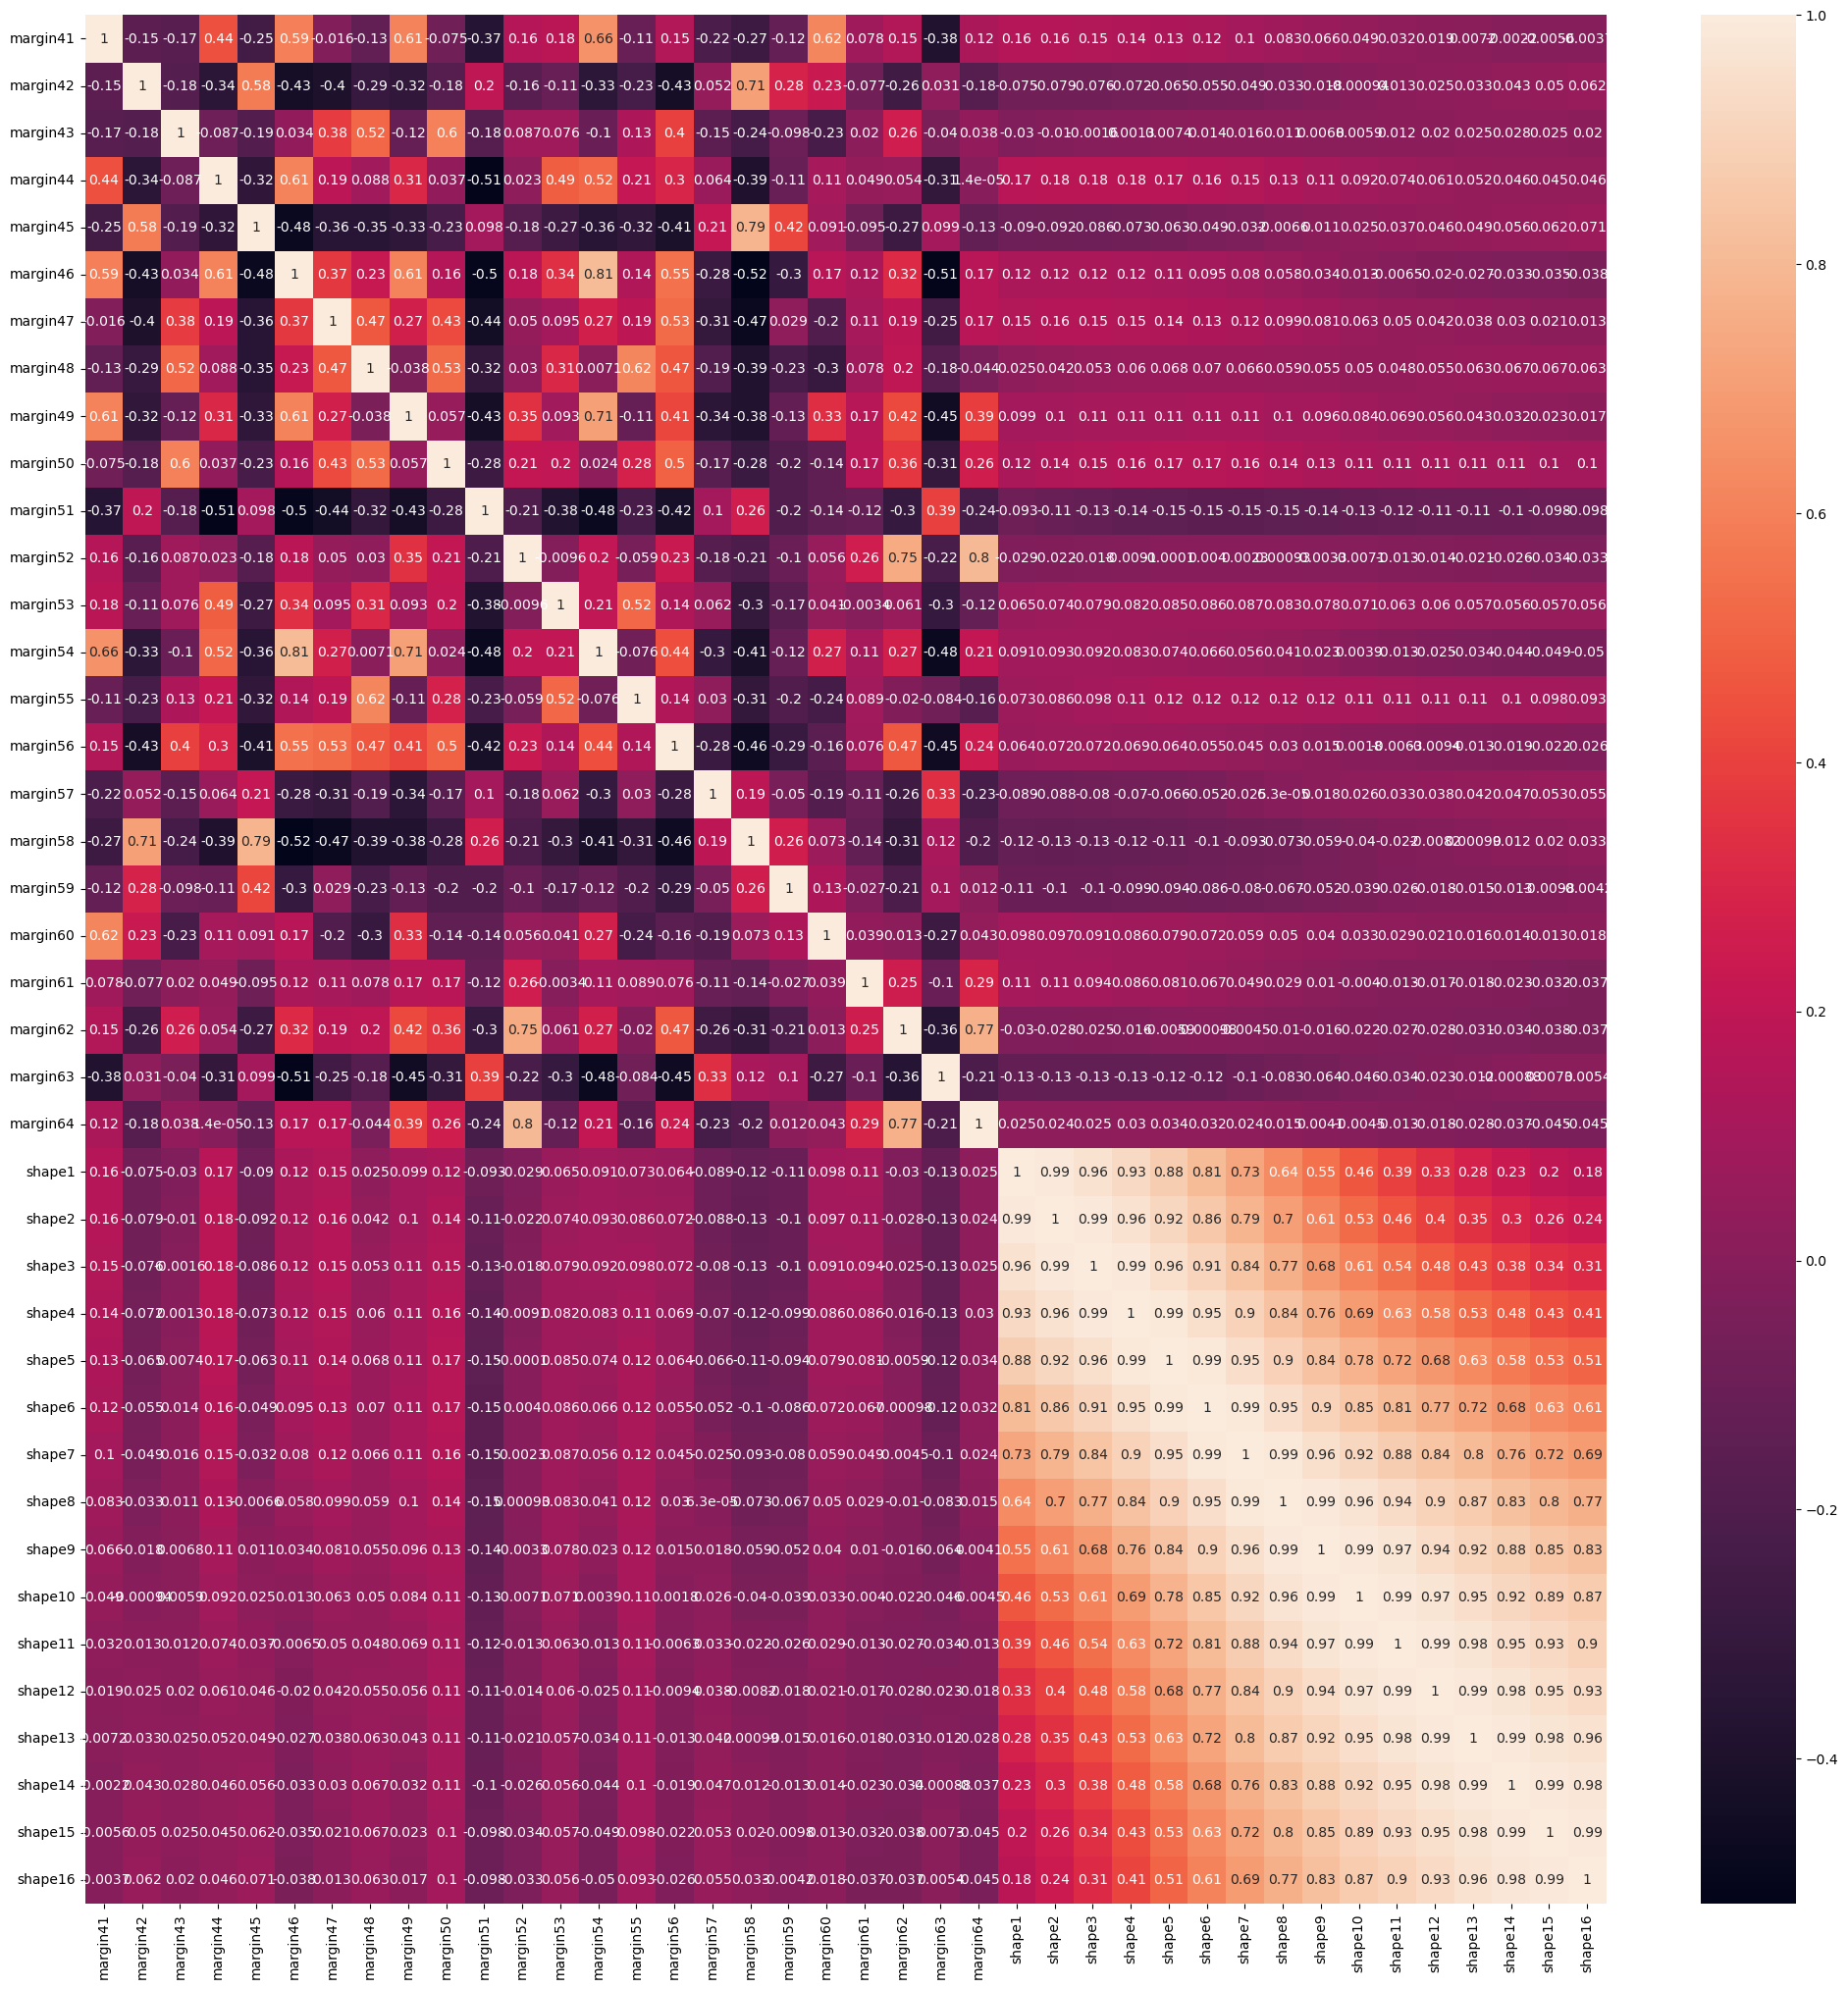

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(corr2,annot=True)

<AxesSubplot:>

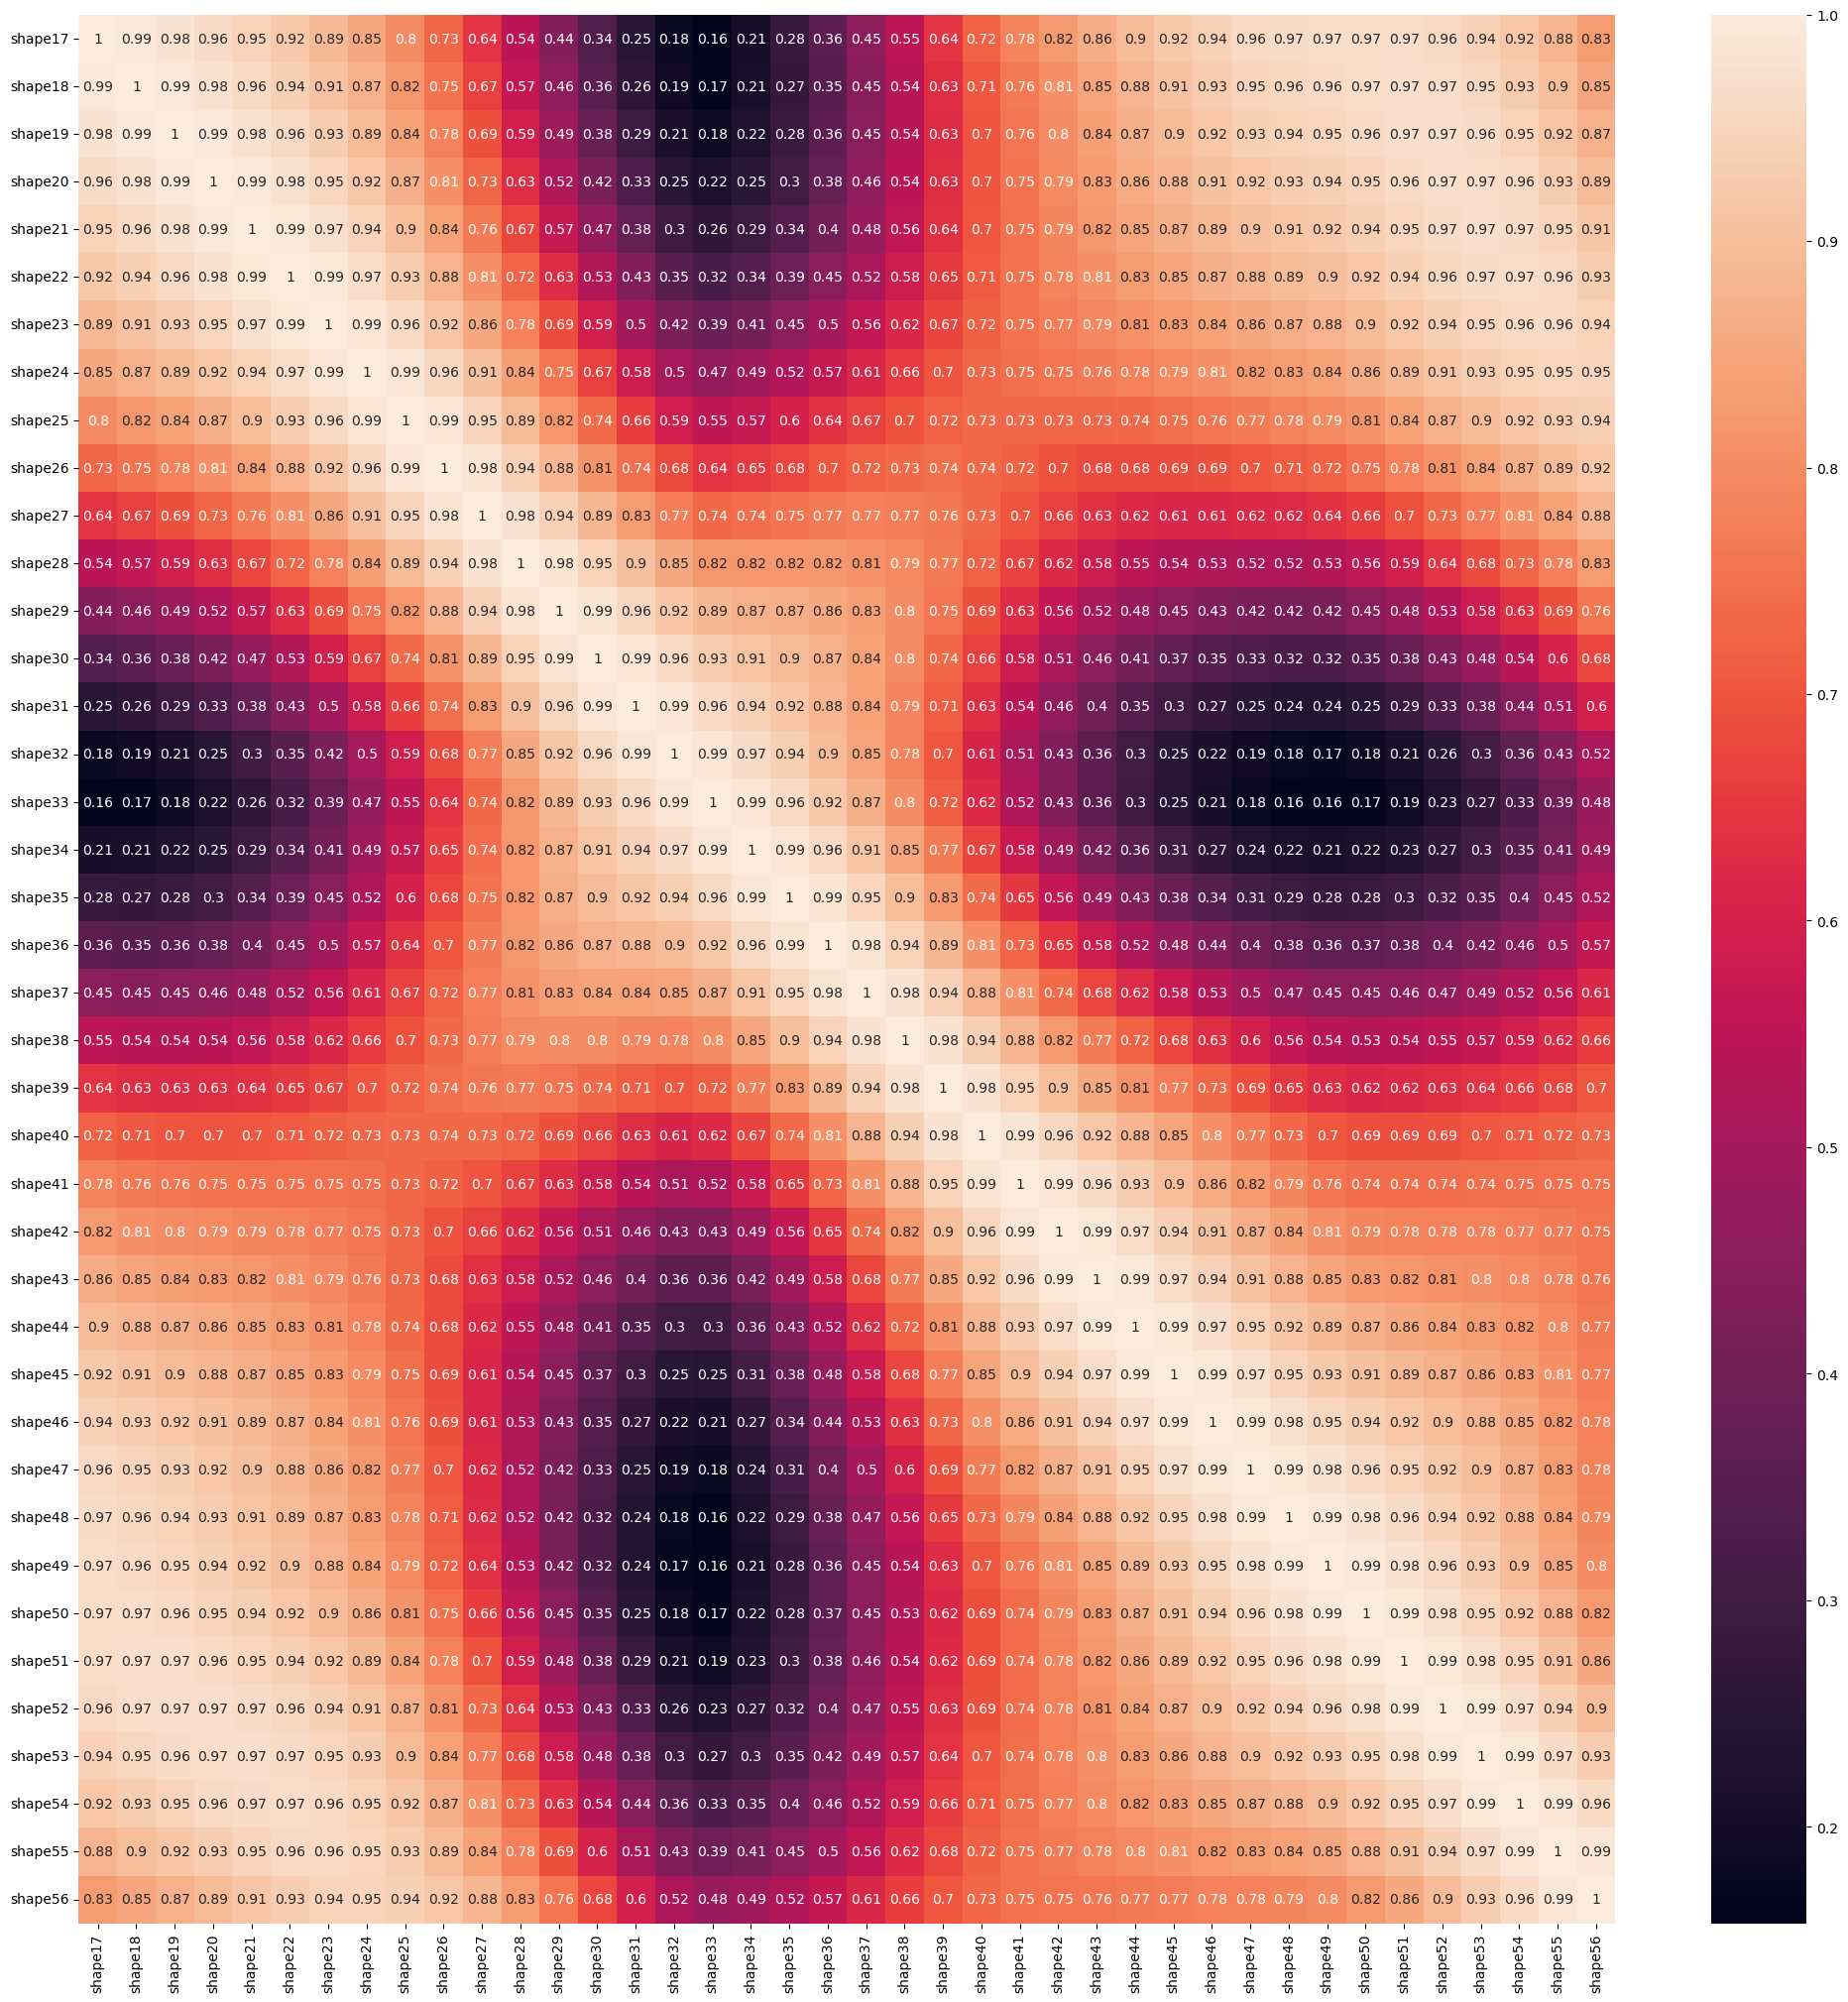

In [21]:
plt.figure(figsize=(25,25))
sns.heatmap(corr3,annot=True)

<AxesSubplot:>

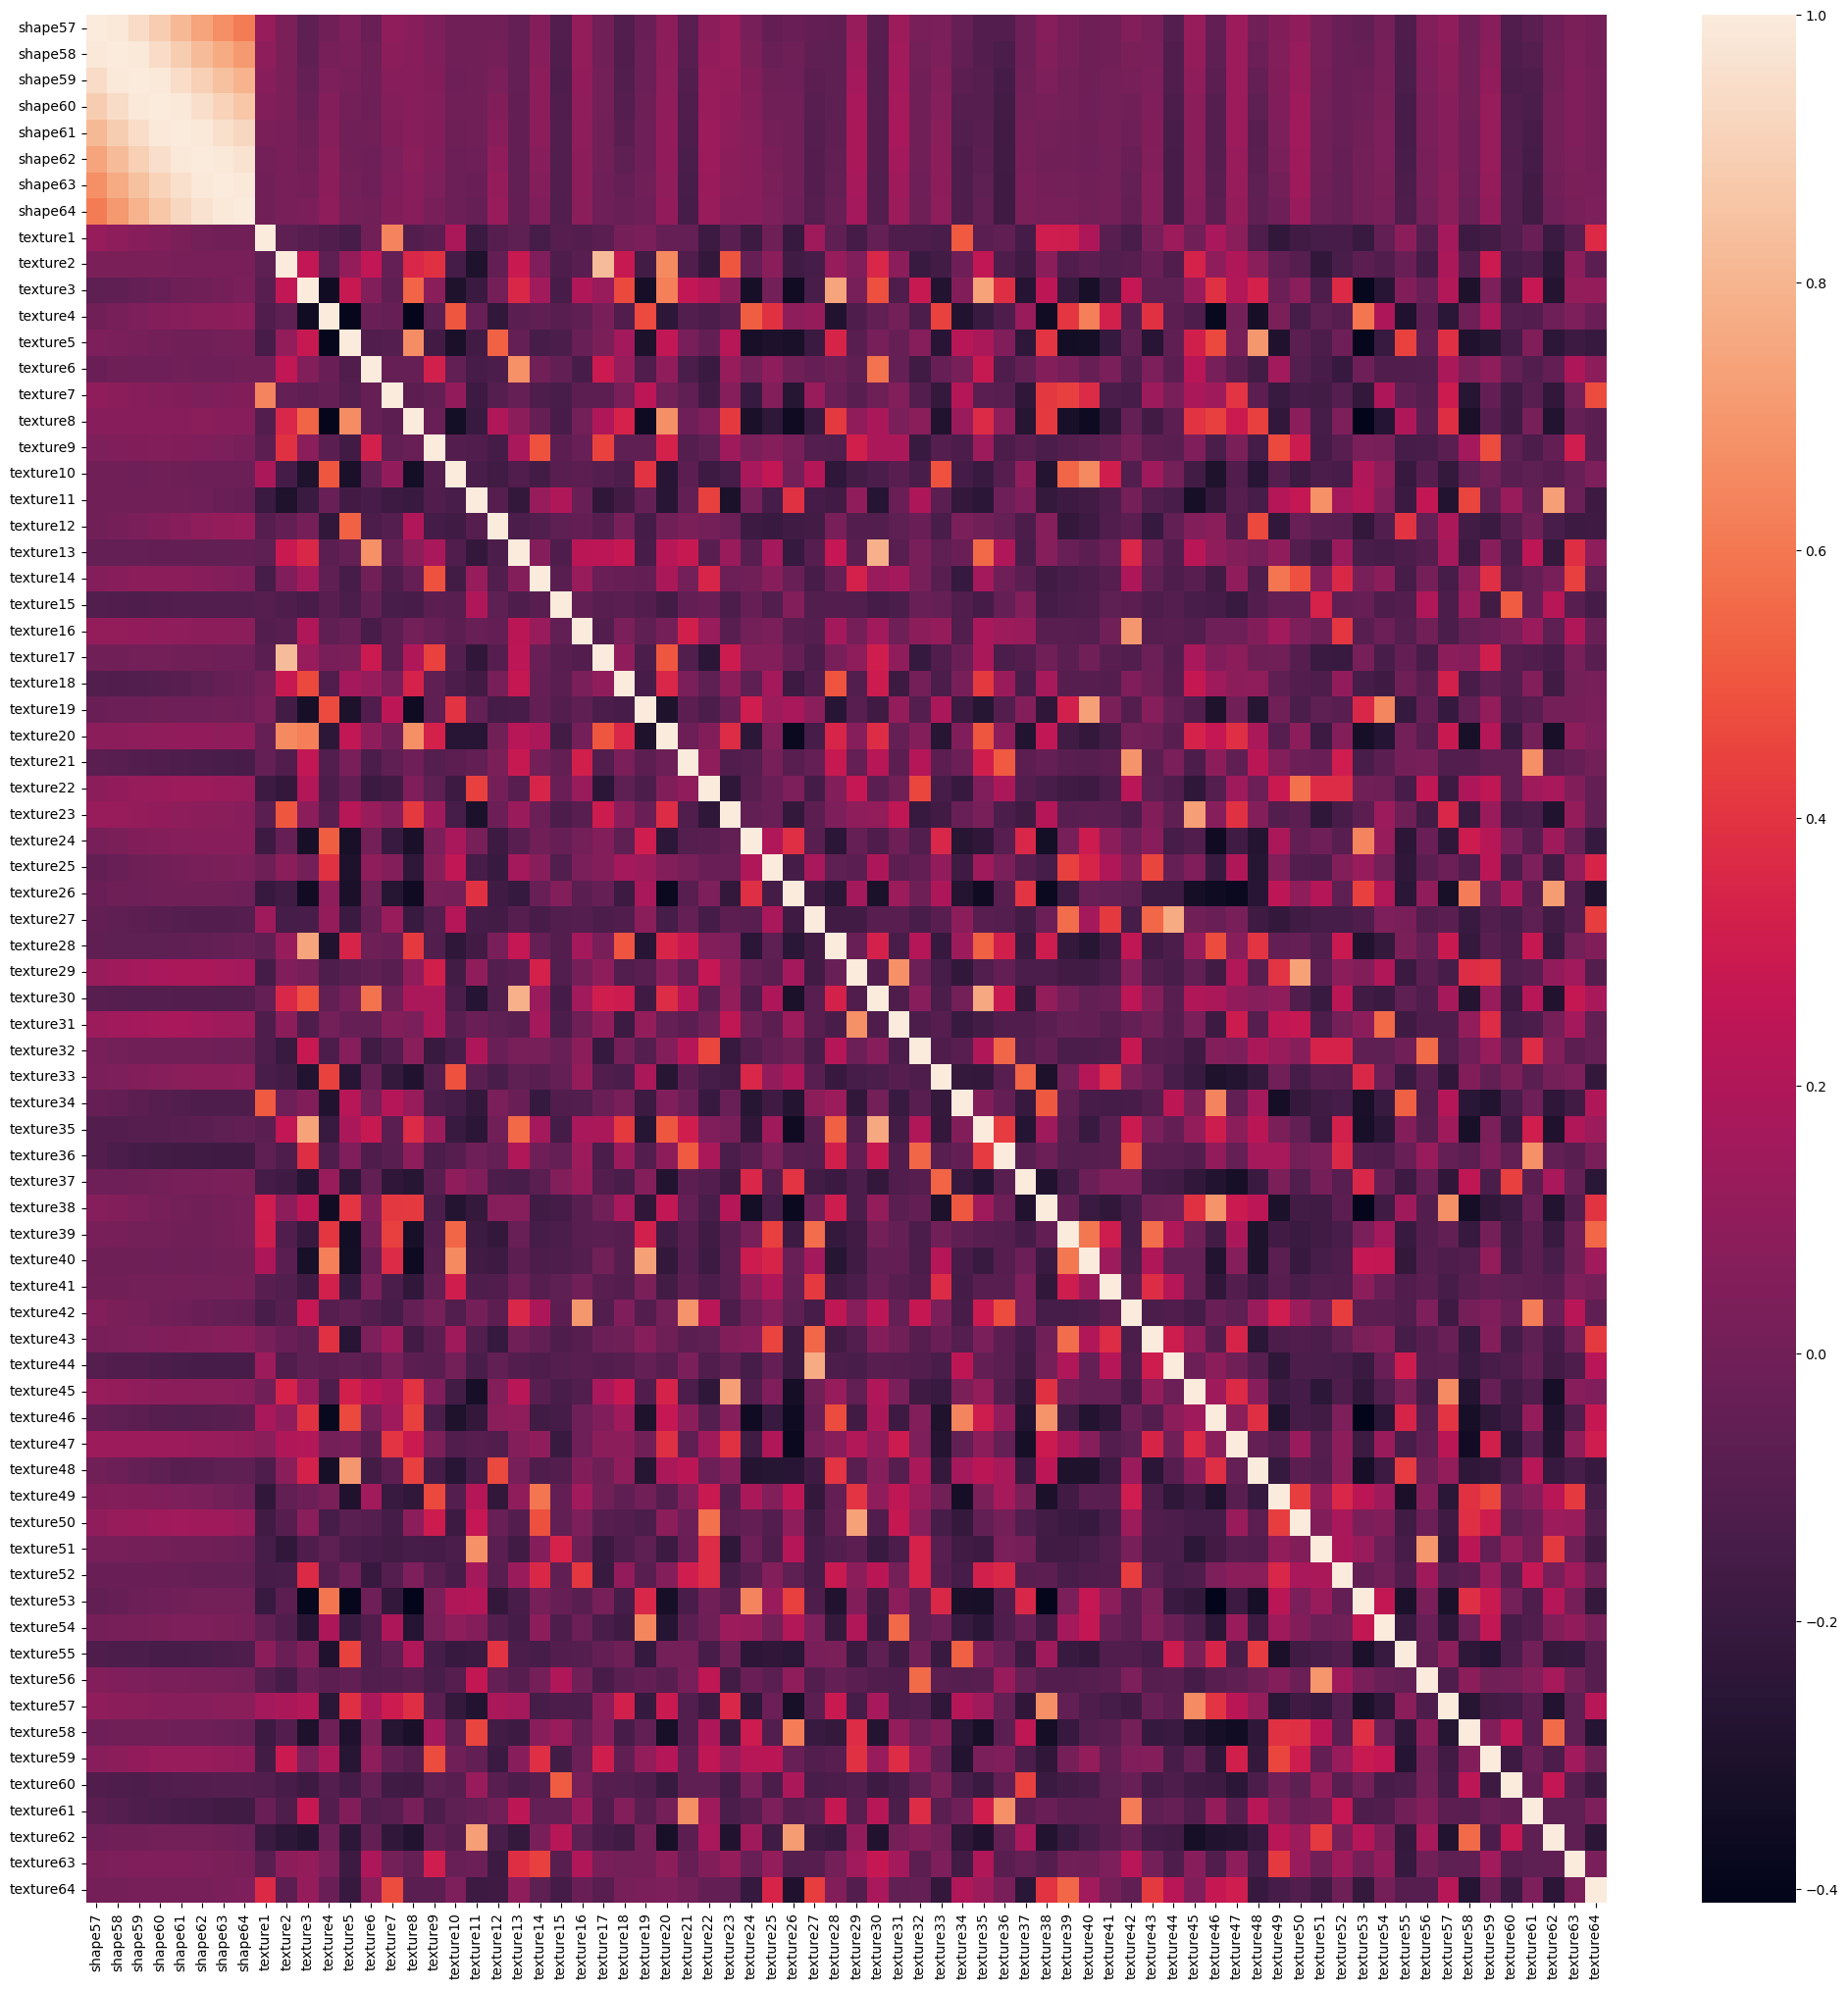

In [22]:
plt.figure(figsize=(25,25))
sns.heatmap(corr4)

<AxesSubplot:>

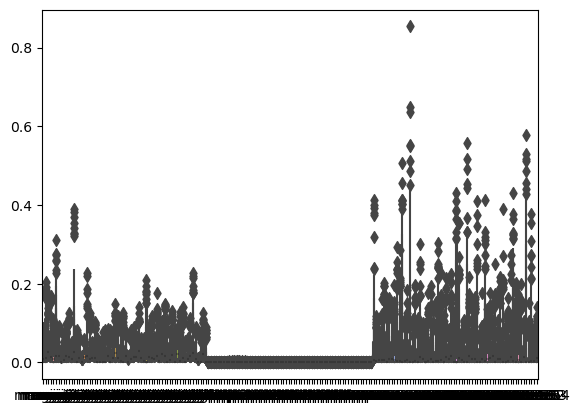

In [23]:
sns.boxenplot(df_train)

# Split data train & validation

In [24]:
X = df_train.drop(columns=["species"])
y = df_train["species"]

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=100, test_size=0.2, shuffle=True, stratify= y)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(792, 192)
(792,)
(198, 192)
(198,)


In [27]:
X_train.head()

margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
id                                                                           
1213  0.003906  0.000000  0.017578  0.009766  0.021484  0.013672  0.023438   
26    0.009766  0.062500  0.033203  0.029297  0.011719  0.044922  0.005859   
1077  0.000000  0.000000  0.015625  0.019531  0.082031  0.000000  0.000000   
682   0.005859  0.005859  0.058594  0.011719  0.007812  0.007812  0.052734   
994   0.023438  0.007812  0.041016  0.035156  0.017578  0.021484  0.039062   

       margin8   margin9  margin10  ...  texture55  texture56  texture57  \
id                                  ...                                    
1213  0.007812  0.001953  0.021484  ...        0.0   0.000977   0.000000   
26    0.000000  0.009766  0.017578  ...        0.0   0.000000   0.004883   
1077  0.005859  0.005859  0.000000  ...        0.0   0.000000   0.000000   
682   0.000000  0.001953  0.015625  ...        0.0   0.000000   0.078125   
994   0.005859  0.000000  0.035156  ...        0.0   0.017578   0.000000   

      texture58  texture59  texture60  texture61  texture62  texture63  \
id                                                                       
1213   0.071289   0.008789   0.050781        0.0   0.092773   0.002930   
26     0.000000   0.068359   0.000000        0.0   0.000000   0.036133   
1077   0.104490   0.003906   0.064453        0.0   0.088867   0.000000   
682    0.000000   0.000000   0.000000        0.0   0.000000   0.000000   
994    0.008789   0.000000   0.037109        0.0   0.113280   0.000000   

      texture64  
id               
1213   0.000000  
26     0.000977  
1077   0.000000  
682    0.035156  
994    0.000000  

[5 rows x 192 columns]

In [28]:
X_val.head()

margin1   margin2   margin3   margin4   margin5  margin6   margin7  \
id                                                                          
1344  0.041016  0.070312  0.013672  0.011719  0.000000  0.10352  0.009766   
570   0.000000  0.000000  0.021484  0.019531  0.044922  0.00000  0.007812   
72    0.001953  0.000000  0.015625  0.058594  0.007812  0.00000  0.005859   
464   0.009766  0.121090  0.003906  0.007812  0.001953  0.21289  0.003906   
802   0.000000  0.000000  0.099609  0.117190  0.013672  0.00000  0.000000   

       margin8   margin9  margin10  ...  texture55  texture56  texture57  \
id                                  ...                                    
1344  0.007812  0.005859  0.023438  ...   0.072266   0.000000   0.000977   
570   0.000000  0.017578  0.001953  ...   0.055664   0.034180   0.002930   
72    0.000000  0.007812  0.009766  ...   0.004883   0.000000   0.007812   
464   0.000000  0.007812  0.001953  ...   0.160160   0.027344   0.003906   
802   0.000000  0.013672  0.000000  ...   0.000000   0.000000   0.017578   

      texture58  texture59  texture60  texture61  texture62  texture63  \
id                                                                       
1344   0.000000   0.012695        0.0        0.0   0.000000   0.006836   
570    0.008789   0.017578        0.0        0.0   0.043945   0.000000   
72     0.000000   0.009766        0.0        0.0   0.000000   0.051758   
464    0.000000   0.009766        0.0        0.0   0.016602   0.000000   
802    0.000977   0.020508        0.0        0.0   0.007812   0.014648   

      texture64  
id               
1344   0.058594  
570    0.006836  
72     0.025391  
464    0.002930  
802    0.095703  

[5 rows x 192 columns]

# Scale data

In [29]:
scale_dict={}
for i in X.columns:
    mean = np.mean(X_train[i])
    std = np.std(X_train[i])
    X_train[i] = (X_train[i] - mean)/std
    X_val[i] = (X_val[i] - mean)/std
    list_value = [mean, std]
    scale_dict[i] = list_value

In [30]:
X_train.head()

margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
id                                                                           
1213 -0.683076 -0.732940 -0.557479 -0.473581  0.382923 -0.475977  0.244856   
26   -0.388656  0.872837  0.050361  0.200786 -0.139054  0.131496 -0.764515   
1077 -0.879322 -0.732940 -0.633454 -0.136415  3.619393 -0.741750 -1.100933   
682  -0.584952 -0.582408  1.038116 -0.406148 -0.347898 -0.589891  1.927007   
994   0.298258 -0.532231  0.354301  0.403086  0.174132 -0.324119  1.141973   

       margin8   margin9  margin10  ...  texture55  texture56  texture57  \
id                                  ...                                    
1213  2.411979 -0.589312  0.185120  ...  -0.577999  -0.213252  -0.693631   
26   -0.382886  0.283558 -0.057834  ...  -0.577999  -0.262534  -0.475243   
1077  1.713263 -0.152933 -1.151190  ...  -0.577999  -0.262534  -0.693631   
682  -0.382886 -0.589312 -0.179311  ...  -0.577999  -0.262534   2.800436   
994   1.713263 -0.807502  1.035521  ...  -0.577999   0.624141  -0.693631   

      texture58  texture59  texture60  texture61  texture62  texture63  \
id                                                                       
1213   2.419539  -0.477607   0.675852  -0.236776   1.900380  -0.441734   
26    -0.457575   3.435193  -0.225461  -0.236776  -0.516661   1.947416   
1077   3.759480  -0.798342   0.918517  -0.236776   1.798616  -0.652565   
682   -0.457575  -1.054904  -0.225461  -0.236776  -0.516661  -0.652565   
994   -0.102865  -1.054904   0.433188  -0.236776   2.434654  -0.652565   

      texture64  
id               
1213  -0.861912  
26    -0.818329  
1077  -0.861912  
682    0.706345  
994   -0.861912  

[5 rows x 192 columns]

In [31]:
X_val.head()

margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
id                                                                           
1344  1.181417  1.073546 -0.709429 -0.406148 -0.765480  1.270592 -0.540178   
570  -0.879322 -0.732940 -0.405529 -0.136415  1.635774 -0.741750 -0.652375   
72   -0.781199 -0.732940 -0.633454  1.212355 -0.347898 -0.741750 -0.764515   
464  -0.388656  2.378156 -1.089344 -0.541049 -0.661085  3.396652 -0.876654   
802  -0.879322 -0.732940  2.633672  3.235562 -0.034659 -0.741750 -1.100933   

       margin8   margin9  margin10  ...  texture55  texture56  texture57  \
id                                  ...                                    
1344  2.411979 -0.152933  0.306659  ...   0.537721  -0.262534  -0.649936   
570  -0.382886  1.156316 -1.029713  ...   0.281401   1.461585  -0.562590   
72   -0.382886  0.065256 -0.543742  ...  -0.502610  -0.262534  -0.344247   
464  -0.382886  0.065256 -1.029713  ...   1.894722   1.116761  -0.518939   
802  -0.382886  0.719937 -1.151190  ...  -0.577999  -0.262534   0.092528   

      texture58  texture59  texture60  texture61  texture62  texture63  \
id                                                                       
1344  -0.457575  -0.221045  -0.225461  -0.236776  -0.516661  -0.160674   
570   -0.102865   0.099690  -0.225461  -0.236776   0.628250  -0.652565   
72    -0.457575  -0.413434  -0.225461  -0.236776  -0.516661   3.071726   
464   -0.457575  -0.413434  -0.225461  -0.236776  -0.084125  -0.652565   
802   -0.418145   0.292144  -0.225461  -0.236776  -0.313133   0.401445   

      texture64  
id               
1344   1.751879  
570   -0.556968  
72     0.270743  
464   -0.731209  
802    3.407255  

[5 rows x 192 columns]

# Encode label

In [32]:
Ohe = OneHotEncoder()
Ohe.fit(y_train)
y_train = Ohe.transform(y_train)

In [33]:
y_train[:5]

species_1  species_2  species_3  species_4  species_5  species_6  \
id                                                                       
1213          1          0          0          0          0          0   
26            0          1          0          0          0          0   
1077          0          0          1          0          0          0   
682           0          0          0          1          0          0   
994           0          0          0          0          1          0   

      species_7  species_8  species_9  species_10  ...  species_90  \
id                                                 ...               
1213          0          0          0           0  ...           0   
26            0          0          0           0  ...           0   
1077          0          0          0           0  ...           0   
682           0          0          0           0  ...           0   
994           0          0          0           0  ...           0   

      species_91  species_92  species_93  species_94  species_95  species_96  \
id                                                                             
1213           0           0           0           0           0           0   
26             0           0           0           0           0           0   
1077           0           0           0           0           0           0   
682            0           0           0           0           0           0   
994            0           0           0           0           0           0   

      species_97  species_98  species_99  
id                                        
1213           0           0           0  
26             0           0           0  
1077           0           0           0  
682            0           0           0  
994            0           0           0  

[5 rows x 99 columns]

In [34]:
y_val = Ohe.transform(y_val)

# Build model

In [35]:
n_features = X_train.shape[1]
y_train.shape

(792, 99)

In [36]:
layers = [150, 200, 300]
optimize = ["sgd", "adam", "rmsprop"]
learning_rate_list = [0.001, 0.01, 0.1]
# weight_decay_list = [0.1,0.001,0.0001]
drop = [0.5,0.6,0.8]
batch_size_list = [99,198,396]

hidden nodes =150
Train Accuracy: 1.000
Train loss: 0.001
Test Accuracy: 0.990
Test loss: 0.037
********************************************************************************


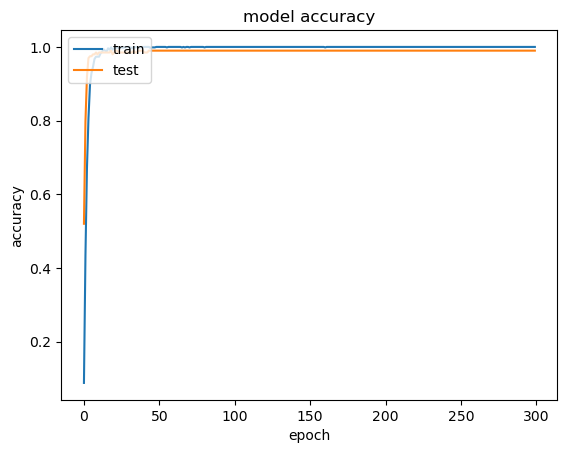

hidden nodes =200
Train Accuracy: 1.000
Train loss: 0.007
Test Accuracy: 0.990
Test loss: 0.059
********************************************************************************


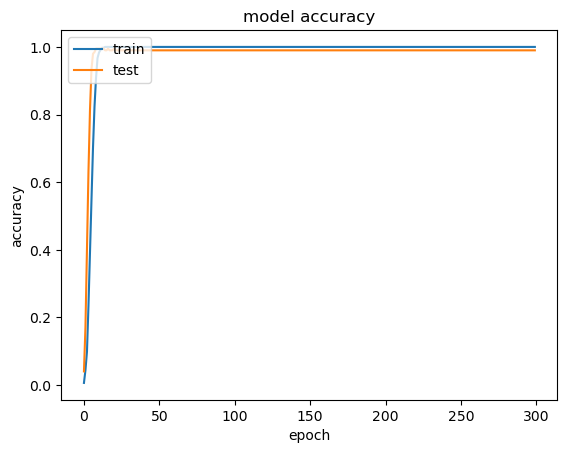

hidden nodes =300
Train Accuracy: 1.000
Train loss: 0.008
Test Accuracy: 0.990
Test loss: 0.067
********************************************************************************


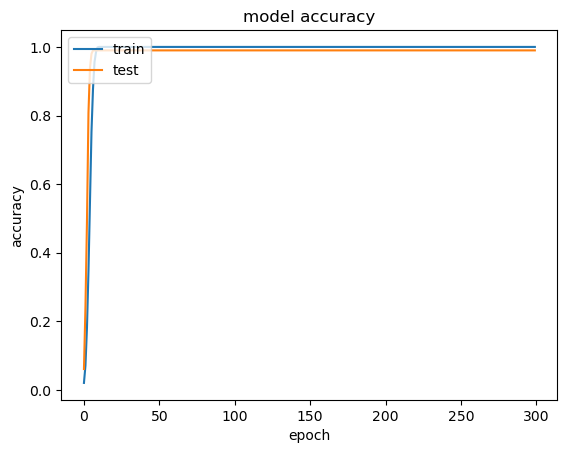

In [37]:
model = Sequential()
acc_t_l = []
acc_val_l = []
for l in layers:
    model.add(Dense(l, activation='tanh', input_shape=(n_features,)))
    model.add(Dropout(rate = 0.5))
    model.add(Dense(99, activation = 'softmax')) 
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(X_train, y_train,epochs=300, verbose=0,validation_data=(X_val, y_val))
    loss_t, acc_t = model.evaluate(X_train, y_train, verbose=0)
    loss, acc = model.evaluate(X_val, y_val, verbose=0,)
    
    print("hidden nodes =" + str(l))
    print('Train Accuracy: %.3f' % acc_t)
    print('Train loss: %.3f' % loss_t)
    print('Test Accuracy: %.3f' % acc)
    print('Test loss: %.3f' % loss)
    print("*"*80)
    acc_t_l.append(acc_t)
    acc_val_l.append(acc)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
 #Anther way to evaluate    
#     def model_evaluate(X, y, model):
#   _, accuracy = model.evaluate(X, y, verbose=0)
#   return accuracy

                        

drop out =0.5
Train Accuracy: 1.000
Train loss: 0.001
Test Accuracy: 0.995
Test loss: 0.035
********************************************************************************


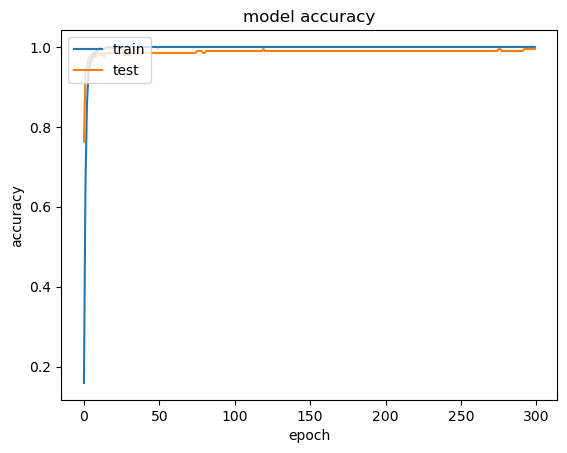

drop out =0.6
Train Accuracy: 1.000
Train loss: 0.007
Test Accuracy: 0.995
Test loss: 0.051
********************************************************************************


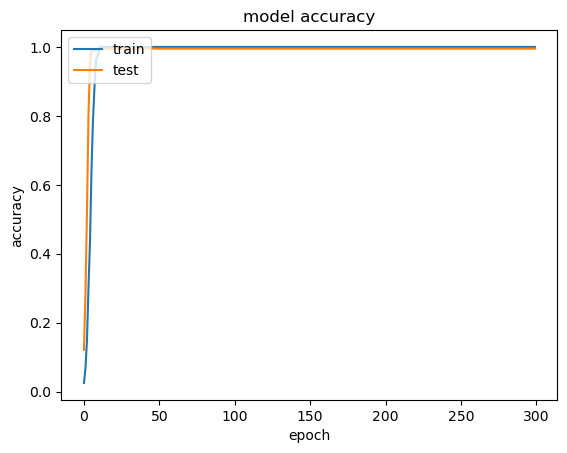

drop out =0.8
Train Accuracy: 1.000
Train loss: 0.003
Test Accuracy: 0.995
Test loss: 0.071
********************************************************************************


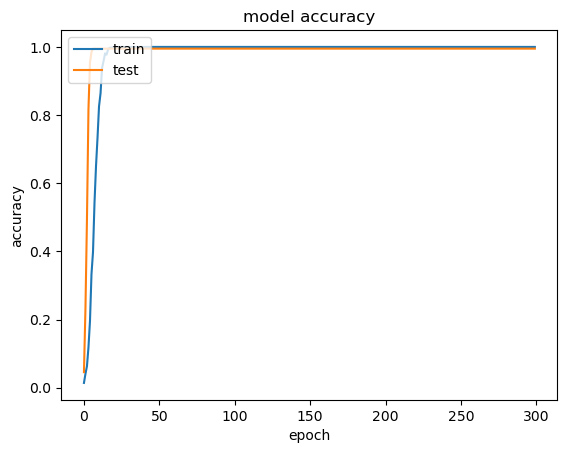

In [38]:
model = Sequential()
acc_t_d = []
acc_val_d = []
for d in drop:
    model.add(Dense(300, activation='tanh', input_shape=(n_features,)))
    model.add(Dropout(rate = d))
    model.add(Dense(99, activation = 'softmax')) 
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(X_train, y_train,epochs=300, verbose=0,validation_data=(X_val, y_val))
    loss_t, acc_t = model.evaluate(X_train, y_train, verbose=0)
    loss, acc = model.evaluate(X_val, y_val, verbose=0,)
    
    print("drop out =" + str(d))
    print('Train Accuracy: %.3f' % acc_t)
    print('Train loss: %.3f' % loss_t)
    print('Test Accuracy: %.3f' % acc)
    print('Test loss: %.3f' % loss)
    print("*"*80)
    acc_t_d.append(acc_t)
    acc_val_d.append(acc)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

learning rate =0.001
Train Accuracy: 0.989
Train loss: 0.543
Test Accuracy: 0.965
Test loss: 0.713
********************************************************************************


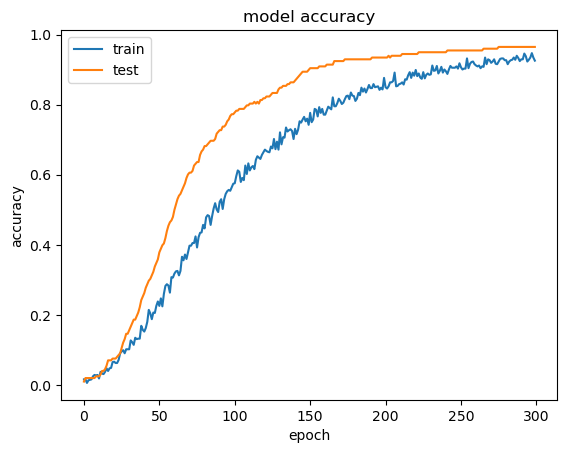

learning rate =0.01
Train Accuracy: 0.864
Train loss: 2.811
Test Accuracy: 0.843
Test loss: 2.891
********************************************************************************


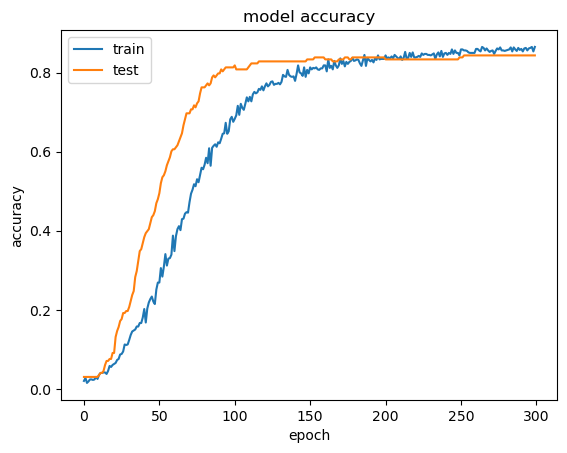

learning rate =0.1
Train Accuracy: 0.713
Train loss: 1.143
Test Accuracy: 0.687
Test loss: 1.230
********************************************************************************


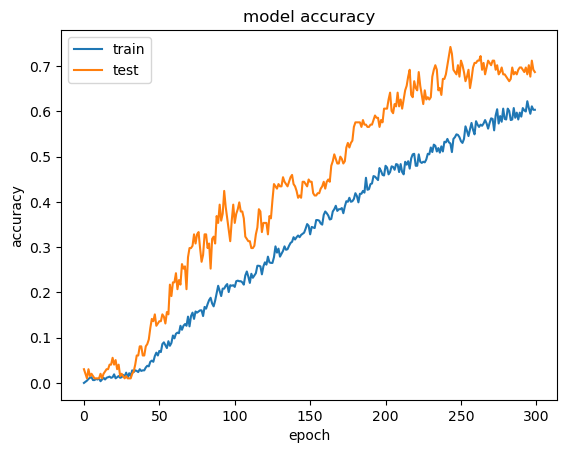

In [39]:
model = Sequential()
acc_t_lr = []
acc_val_lr = []
for lr in learning_rate_list:
    model.add(Dense(300, activation='tanh', input_shape=(n_features,)))
    model.add(Dropout(rate = 0.5))
    model.add(Dense(99, activation = 'softmax')) 
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(X_train, y_train,epochs=300, verbose=0,validation_data=(X_val, y_val))
    loss_t, acc_t = model.evaluate(X_train, y_train, verbose=0)
    loss, acc = model.evaluate(X_val, y_val, verbose=0,)
    
    print("learning rate =" + str(lr))
    print('Train Accuracy: %.3f' % acc_t)
    print('Train loss: %.3f' % loss_t)
    print('Test Accuracy: %.3f' % acc)
    print('Test loss: %.3f' % loss)
    print("*"*80)
    acc_t_lr.append(acc_t)
    acc_val_lr.append(acc)
    
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

optemizer is : sgd
Train Accuracy: 0.991
Train loss: 0.521
Test Accuracy: 0.960
Test loss: 0.672
********************************************************************************


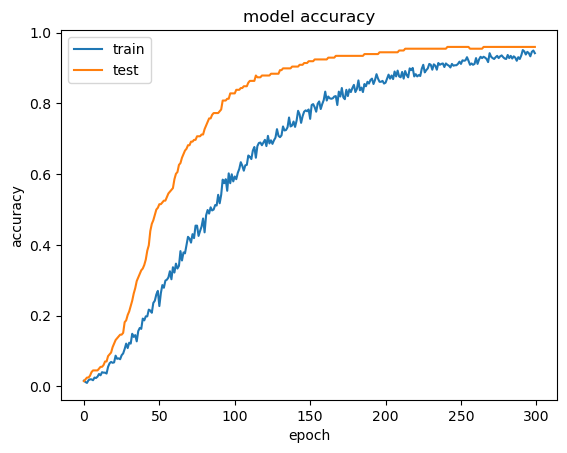

optemizer is : adam
Train Accuracy: 0.926
Train loss: 0.128
Test Accuracy: 0.899
Test loss: 0.274
********************************************************************************


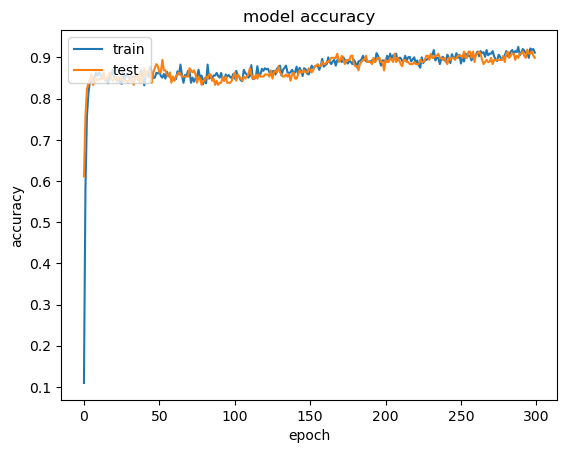

optemizer is : rmsprop
Train Accuracy: 0.919
Train loss: 0.124
Test Accuracy: 0.904
Test loss: 0.281
********************************************************************************


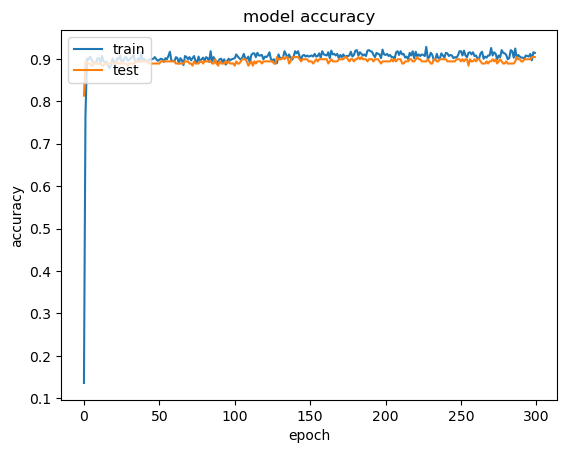

In [40]:
model = Sequential()
opt_dict={}

for opt in optimize:
            if opt == "sgd":
                model.add(Dense(300, activation='tanh', input_shape=(n_features,)))
                model.add(Dropout(rate = 0.5))
                model.add(Dense(99, activation = 'softmax')) 
                model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
                history = model.fit(X_train, y_train,epochs=300, verbose=0,validation_data=(X_val, y_val))
                loss_t, acc_t = model.evaluate(X_train, y_train, verbose=0)
                loss, acc = model.evaluate(X_val, y_val, verbose=0,)
    
                print("optemizer is : sgd")
                print('Train Accuracy: %.3f' % acc_t)
                print('Train loss: %.3f' % loss_t)
                print('Test Accuracy: %.3f' % acc)
                print('Test loss: %.3f' % loss)
                print("*"*80)
                
                opt_dict["sgd"]= [acc_t,acc]
                
                plt.plot(history.history['accuracy'])
                plt.plot(history.history['val_accuracy'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                
                
            elif opt == "adam":
                model.add(Dense(300, activation='tanh', input_shape=(n_features,)))
                model.add(Dropout(rate = 0.5))
                model.add(Dense(99, activation = 'softmax')) 
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
                history = model.fit(X_train, y_train,epochs=300, verbose=0,validation_data=(X_val, y_val))
                loss_t, acc_t = model.evaluate(X_train, y_train, verbose=0)
                loss, acc = model.evaluate(X_val, y_val, verbose=0,)
    
                print("optemizer is : adam")
                print('Train Accuracy: %.3f' % acc_t)
                print('Train loss: %.3f' % loss_t)
                print('Test Accuracy: %.3f' % acc)
                print('Test loss: %.3f' % loss)
                print("*"*80)
                
                opt_dict["adam"]= [acc_t,acc]
                
                
                           
                plt.plot(history.history['accuracy'])
                plt.plot(history.history['val_accuracy'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                
                
                
            elif opt == "rmsprop":
                model.add(Dense(300, activation='tanh', input_shape=(n_features,)))
                model.add(Dropout(rate = 0.5))
                model.add(Dense(99, activation = 'softmax')) 
                model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
                history = model.fit(X_train, y_train,epochs=300, verbose=0,validation_data=(X_val, y_val))
                loss_t, acc_t = model.evaluate(X_train, y_train, verbose=0)
                loss, acc = model.evaluate(X_val, y_val, verbose=0,)
    
                print("optemizer is : rmsprop")
                print('Train Accuracy: %.3f' % acc_t)
                print('Train loss: %.3f' % loss_t)
                print('Test Accuracy: %.3f' % acc)
                print('Test loss: %.3f' % loss)
                print("*"*80)
                
                opt_dict["rmsprop"]= [acc_t,acc]
                
                
                           
                plt.plot(history.history['accuracy'])
                plt.plot(history.history['val_accuracy'])
                plt.title('model accuracy')
                plt.ylabel('accuracy')
                plt.xlabel('epoch')
                plt.legend(['train', 'test'], loc='upper left')
                plt.show()
                